<a href="https://colab.research.google.com/github/Prathamesh326/Space-Mission-Analaysis/blob/main/Space_Missions_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [54]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [55]:
%pip install --upgrade plotly

### Import Statements

In [56]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [57]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [58]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [59]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [60]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [61]:
df_data.shape

(4324, 9)

In [62]:
df_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

In [63]:
df_data.isna().sum()

,0
Unnamed: 0.1,0
Unnamed: 0,0
Organisation,0
Location,0
Date,0
Detail,0
Rocket_Status,0
Price,3360
Mission_Status,0


In [64]:
# df_data.drop(columns="Price", inplace=True)

In [65]:
df_data.duplicated().sum()

0

## Descriptive Statistics

In [66]:
df_data.describe(include='all')

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,"4,324.00","4,324.00",4324,4324,4324,4324,4324,964,4324
unique,NaN,NaN,56,137,4319,4278,2,56,4
top,NaN,NaN,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Wed Nov 05, 2008 00:15 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,NaN,NaN,1777,235,2,6,3534,136,3879
mean,"2,161.50","2,161.50",NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,"1,248.38","1,248.38",NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,"1,080.75","1,080.75",NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,"2,161.50","2,161.50",NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,"3,242.25","3,242.25",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
df_data.count()

,0
Unnamed: 0.1,4324
Unnamed: 0,4324
Organisation,4324
Location,4324
Date,4324
Detail,4324
Rocket_Status,4324
Price,964
Mission_Status,4324


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [68]:
launch_counts = df_data.groupby('Organisation')['Organisation'].count().reset_index(name="Launch Count")
launch_counts = launch_counts.sort_values(by=['Launch Count'], ascending=False)


In [69]:
fig = px.bar(launch_counts, x='Organisation', y='Launch Count',
       title='Number of Space mission launches by organisations',
       labels={'Organisations':'Organisation', 'Launch Count':'Number of Launches'})

fig.update_layout(xaxis_tickangle=-45, xaxis={'categoryorder':'total descending'})

fig.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?

In [70]:
rocket_status_counts = df_data.groupby('Rocket_Status')['Rocket_Status'].count().reset_index(name='Count')
print(rocket_status_counts)

   Rocket_Status  Count
0   StatusActive    790
1  StatusRetired   3534


# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [71]:
df_data['Mission_Status'].unique()

array(['Success', 'Failure', 'Prelaunch Failure', 'Partial Failure'],
      dtype=object)

In [72]:
df_data.groupby('Mission_Status')['Mission_Status'].count().reset_index(name='Count')

,Mission_Status,Count
0,Failure,339
1,Partial Failure,102
2,Prelaunch Failure,4
3,Success,3879


# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

In [73]:
# Extract the 'Price' column and remove missing values
launch_prices = df_data['Price'].dropna()

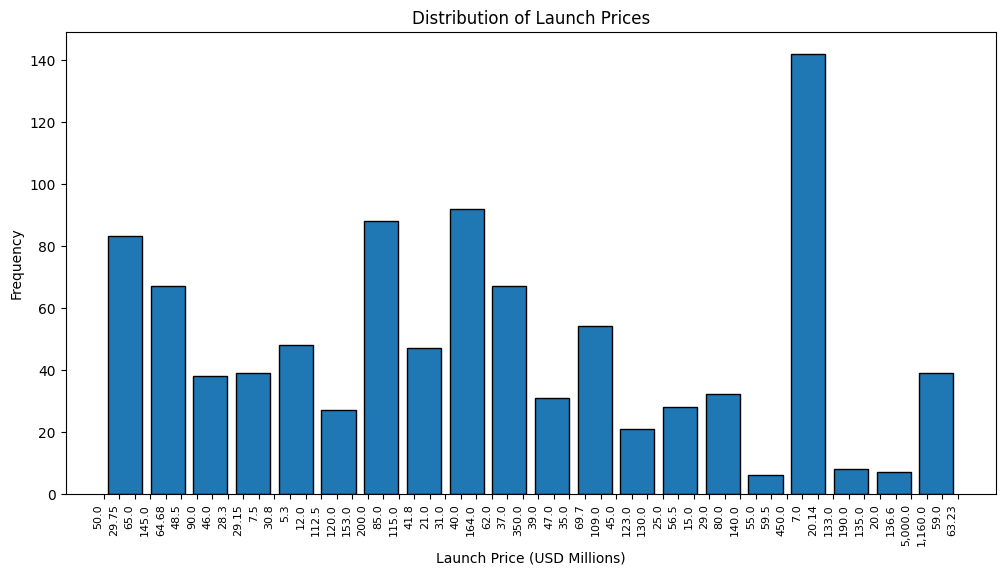

In [74]:
plt.figure(figsize=(12, 6))
plt.hist(launch_prices, bins=20, edgecolor='black', rwidth=0.8)
plt.xlabel('Launch Price (USD Millions)')
plt.ylabel('Frequency')
plt.title('Distribution of Launch Prices')
plt.xticks(rotation=90, ha='right', fontsize=8)
plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [75]:
def map_country(country):
    mappings = {
        'Russia': 'Russian Federation',
        'New Mexico': 'USA',
        'Yellow Sea': 'China',
        'Shahrud Missile Test Site': 'Iran',
        'Pacific Missile Range Facility': 'USA',
        'Barents Sea': 'Russian Federation',
        'Gran Canaria': 'USA'
    }
    print(mappings.get(country, country))
    return mappings.get(country, country)

df_data['Country'] = df_data['Location'].apply(lambda x:  map_country(x.split(',')[-1].strip()))
df_data['Alpha3'] = df_data['Country'].apply(lambda x:  countries.get(x).alpha3 if x in countries else None)

launches_by_country = df_data.groupby('Alpha3').size().reset_index(name='Launch Count')

USA
China
USA
Kazakhstan
USA
China
Kazakhstan
China
USA
Japan
USA
China
China
Israel
China
New Zealand
China
USA
China
China
USA
New Zealand
China
USA
China
USA
China
USA
Russian Federation
Japan
USA
China
China
Kazakhstan
USA
Iran
China
Kazakhstan
USA
China
Kazakhstan
USA
Russian Federation
China
China
USA
Russian Federation
China
France
USA
USA
USA
Iran
Japan
Kazakhstan
New Zealand
USA
USA
France
China
China
China
USA
China
Russian Federation
Kazakhstan
USA
China
France
USA
China
USA
India
Russian Federation
China
China
Kazakhstan
New Zealand
USA
China
India
France
Russian Federation
China
China
China
China
USA
China
China
USA
USA
China
New Zealand
USA
Kazakhstan
China
Russian Federation
Kazakhstan
China
Japan
China
China
China
China
Russian Federation
Iran
USA
Kazakhstan
New Zealand
China
China
USA
USA
France
Kazakhstan
Kazakhstan
Russian Federation
China
USA
China
India
Kazakhstan
Kazakhstan
France
Russian Federation
Russian Federation
USA
New Zealand
USA
China
France
USA
China
Kaz

In [76]:
fig = px.choropleth(launches_by_country, locations='Alpha3', color='Launch Count', title='Number of Launches by Country', color_continuous_scale='matter')
fig.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [77]:
failures_by_country = df_data[df_data['Mission_Status'] == 'Failure'].groupby('Alpha3').size().reset_index(name='Failure Count')

In [78]:
fig = px.choropleth(failures_by_country, locations='Alpha3', color='Failure Count', title='Number of Failures by Country', color_continuous_scale='reds')
fig.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [79]:
fig = px.sunburst(df_data, path=['Country', 'Organisation', 'Mission_Status'], title='Sunburst Chart of Missions by Country, Organisation, and Status')
fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [80]:
df_data['Price'] = pd.to_numeric(df_data['Price'], errors='coerce')
total_spent = df_data.groupby('Organisation')['Price'].sum().reset_index()
total_spent = total_spent.sort_values(by='Price', ascending=False)

In [81]:
fig = px.bar(total_spent, x='Organisation', y='Price',
              title='Total Money Spent by Organisation on Space Missions',
              labels={'Price': 'Total Spending (USD Millions)'})
fig.update_layout(xaxis_tickangle=-45)
fig.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [82]:
total_launches = df_data.groupby('Organisation').size().reset_index(name='Launch Count')

In [83]:
money_per_launch = pd.merge(total_spent, total_launches, on='Organisation')
money_per_launch['Cost Per Launch'] = money_per_launch['Price'] / money_per_launch['Launch Count']
money_per_launch = money_per_launch.sort_values(by='Cost Per Launch', ascending=False)

In [84]:
fig = px.bar(money_per_launch, x='Organisation', y='Cost Per Launch',
                 title='Money Spent by Organisation Per Launch',
                 labels={'Cost Per Launch': 'Average Cost Per Launch (USD Millions)'})
fig.update_layout(xaxis_tickangle=-90)
fig.show()

# Chart the Number of Launches per Year

In [85]:
df_data['Launch_Year'] = pd.to_datetime(df_data['Date'], errors='coerce').dt.year

In [86]:
launches_per_year = df_data.groupby('Launch_Year').size().reset_index(name='Launch Count')
fig = px.line(launches_per_year, x='Launch_Year', y='Launch Count',
              title='Number of Launches Per Year',
              labels={'Launch_Year': 'Year', 'Launch Count': 'Number of Launches'})
fig.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

In [91]:
df_data['Launch_Month'] = pd.to_datetime(df_data['Date'], errors='coerce').dt.to_period('M')
launches_monthly = df_data.groupby('Launch_Month').size().reset_index(name='Launch Count')

# Convert Period to String for JSON serialization
launches_monthly['Launch_Month'] = launches_monthly['Launch_Month'].astype(str)

# Calculate the rolling average
launches_monthly['Rolling Average'] = launches_monthly['Launch Count'].rolling(window=3).mean()

# Plot the time series
fig = px.line(launches_monthly, x='Launch_Month', y=['Launch Count', 'Rolling Average'],
              title='Month-on-Month Launches with Rolling Average',
              labels={'Launch_Month': 'Month', 'value': 'Number of Launches'},
              template='plotly_dark')
fig.update_layout(legend_title_text='Metric')
fig.show()

<ipython-input-91-7f892a923b7d>:1: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



In [92]:
# Determine the month with the highest number of launches
max_launch_month = launches_monthly.loc[launches_monthly['Launch Count'].idxmax()]
print("Month with the highest launches:", max_launch_month['Launch_Month'], "with", max_launch_month['Launch Count'], "launches")

Month with the highest launches: 1968-04 with 16 launches


# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [93]:
df_data['Launch_Month_Name'] = pd.to_datetime(df_data['Date'], errors='coerce').dt.month_name()
launches_by_month = df_data['Launch_Month_Name'].value_counts().reset_index()
launches_by_month.columns = ['Month', 'Launch Count']

In [94]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
launches_by_month['Month'] = pd.Categorical(launches_by_month['Month'], categories=month_order, ordered=True)
launches_by_month.sort_values('Month', inplace=True)

fig = px.bar(launches_by_month, x='Month', y='Launch Count',
             title='Launches by Month',
             labels={'Month': 'Month', 'Launch Count': 'Number of Launches'})
fig.show()

In [95]:
# Identify most and least popular months
most_popular_month = launches_by_month.iloc[launches_by_month['Launch Count'].idxmax()]
least_popular_month = launches_by_month.iloc[launches_by_month['Launch Count'].idxmin()]

print("Most popular month for launches:", most_popular_month['Month'], "with", most_popular_month['Launch Count'], "launches")
print("Least popular month for launches:", least_popular_month['Month'], "with", least_popular_month['Launch Count'], "launches")

# Analysis of weather conditions
print("Months with better weather (spring/summer) tend to have higher launch counts: May, June, July, and August.")

Most popular month for launches: January with 265 launches
Least popular month for launches: December with 430 launches
Months with better weather (spring/summer) tend to have higher launch counts: May, June, July, and August.


# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.

In [96]:
# Ensure the 'Date' column is in datetime format
df_data['Date'] = pd.to_datetime(df_data['Date'], errors='coerce')

In [97]:
# Group by year and calculate average price
average_price_over_time = df_data.groupby(df_data['Date'].dt.year)['Price'].mean().reset_index()
average_price_over_time.columns = ['Year', 'Average Price']

fig = px.line(average_price_over_time, x='Year', y='Average Price',
              title='Average Launch Price Over Time',
              labels={'Year': 'Year', 'Average Price': 'Average Price (USD Millions)'})
fig.show()

# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?

In [98]:
# Group by Organisation and Launch Year to get the number of launches
df_data['Launch_Year'] = pd.to_datetime(df_data['Date'], errors='coerce').dt.year
launches_by_org_year = df_data.groupby(['Organisation', 'Launch_Year']).size().reset_index(name='Launch Count')

In [99]:
# Get top 10 organisations based on total number of launches
top_10_orgs = launches_by_org_year.groupby('Organisation')['Launch Count'].sum().nlargest(10).index
top_10_launches = launches_by_org_year[launches_by_org_year['Organisation'].isin(top_10_orgs)]

In [100]:
# Plot the launches over time by the top 10 organisations
fig = px.line(top_10_launches, x='Launch_Year', y='Launch Count', color='Organisation',
              title='Number of Launches Over Time by the Top 10 Organisations',
              labels={'Launch_Year': 'Year', 'Launch Count': 'Number of Launches'})
fig.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.

In [105]:
# Define countries related to USA and USSR
us_countries = ['USA', 'New Mexico', 'Pacific Missile Range Facility', 'Gran Canaria']
ussr_countries = ['Russian Federation', 'Kazakhstan', 'Ukraine', 'Belarus', 'Uzbekistan', 'Turkmenistan', 'Armenia', 'Kyrgyzstan', 'Tajikistan', 'Moldova']

# Mapping function to classify countries as USA or USSR
def classify_superpower(country):
    if any(c in country for c in us_countries):
        return 'USA'
    elif any(c in country for c in ussr_countries):
        return 'USSR'
    return 'Other'

# Apply mapping to classify countries
df_data['Superpower'] = df_data['Location'].apply(lambda x: classify_superpower(x.split(',')[-1].strip()))

In [106]:
# Count launches by Superpower
launches_by_superpower = df_data.groupby('Superpower').size().reset_index(name='Launch Count')

# Plot the comparison of total launches between USA and USSR
fig = px.pie(launches_by_superpower, names='Superpower', values='Launch Count',
             title='Comparison of Total Number of Launches: USA vs USSR')
fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [103]:
# Group by year and superpower
launches_by_superpower_year = df_data.groupby(['Launch_Year', 'Superpower']).size().reset_index(name='Launch Count')

# Filter for only USA and USSR
launches_by_superpower_year = launches_by_superpower_year[launches_by_superpower_year['Superpower'].isin(['USA', 'USSR'])]

In [104]:
# Plot the number of launches year-on-year by the two superpowers
fig = px.line(launches_by_superpower_year, x='Launch_Year', y='Launch Count', color='Superpower',
              title='Total Number of Launches Year-on-Year by the USA and USSR',
              labels={'Launch_Year': 'Year', 'Launch Count': 'Number of Launches'})
fig.show()

## Chart the Total Number of Mission Failures Year on Year.

In [107]:
# Filter only failed missions
failures_by_year = df_data[df_data['Mission_Status'] == 'Failure'].groupby('Launch_Year').size().reset_index(name='Failure Count')

In [108]:
# Plot the total number of mission failures year-on-year
fig = px.line(failures_by_year, x='Launch_Year', y='Failure Count',
              title='Total Number of Mission Failures Year-on-Year',
              labels={'Launch_Year': 'Year', 'Failure Count': 'Number of Failures'})
fig.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?

In [109]:
# Total number of launches year-on-year
total_launches_by_year = df_data.groupby('Launch_Year').size().reset_index(name='Total Launches')

In [110]:
# Merge with failure counts
failure_percentage = pd.merge(failures_by_year, total_launches_by_year, on='Launch_Year')
failure_percentage['Failure Percentage'] = (failure_percentage['Failure Count'] / failure_percentage['Total Launches']) * 100


In [111]:
# Plot the percentage of failures over time
fig = px.line(failure_percentage, x='Launch_Year', y='Failure Percentage',
              title='Percentage of Failures Over Time',
              labels={'Launch_Year': 'Year', 'Failure Percentage': 'Failure Percentage (%)'})
fig.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches?

In [112]:
# Group by year and country
launches_by_country_year = df_data.groupby(['Launch_Year', 'Country']).size().reset_index(name='Launch Count')

In [113]:
# Get the country with the maximum launches for each year
leading_country_year = launches_by_country_year.loc[launches_by_country_year.groupby('Launch_Year')['Launch Count'].idxmax()]

# Plot the leading country in terms of total launches each year
fig = px.line(leading_country_year, x='Launch_Year', y='Launch Count', color='Country',
              title='Leading Country in Terms of Total Launches Each Year (up to 2020)',
              labels={'Launch_Year': 'Year', 'Launch Count': 'Number of Launches'})
fig.show()

In [114]:
# Filter successful missions
successful_launches_by_country_year = df_data[df_data['Mission_Status'] == 'Success'].groupby(['Launch_Year', 'Country']).size().reset_index(name='Launch Count')

# Get the country with the maximum successful launches for each year
leading_successful_country_year = successful_launches_by_country_year.loc[successful_launches_by_country_year.groupby('Launch_Year')['Launch Count'].idxmax()]

# Plot the leading country in terms of successful launches each year
fig = px.line(leading_successful_country_year, x='Launch_Year', y='Launch Count', color='Country',
              title='Leading Country in Terms of Successful Launches Each Year (up to 2020)',
              labels={'Launch_Year': 'Year', 'Launch Count': 'Number of Successful Launches'})
fig.show()


# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?

In [115]:
# Group by year and organisation
launches_by_org_year = df_data.groupby(['Launch_Year', 'Organisation']).size().reset_index(name='Launch Count')

In [116]:
# Get the organisation with the maximum launches for each year
leading_org_year = launches_by_org_year.loc[launches_by_org_year.groupby('Launch_Year')['Launch Count'].idxmax()]

In [117]:
# Plot the organisation with the most launches year-on-year
fig = px.line(leading_org_year, x='Launch_Year', y='Launch Count', color='Organisation',
              title='Organisation Doing the Most Number of Launches Year-on-Year',
              labels={'Launch_Year': 'Year', 'Launch Count': 'Number of Launches'})
fig.show()

Dominant Organisation in the 1970s and 1980s vs 2018-2020

In [118]:
# Filter for the 1970s and 1980s
decades_70s_80s = df_data[df_data['Launch_Year'].between(1970, 1989)]
decades_70s_80s_launches = decades_70s_80s.groupby(['Launch_Year', 'Organisation']).size().reset_index(name='Launch Count')
dominant_70s_80s = decades_70s_80s_launches.loc[decades_70s_80s_launches.groupby('Launch_Year')['Launch Count'].idxmax()]

In [119]:
# Filter for 2018-2020
recent_years = df_data[df_data['Launch_Year'].between(2018, 2020)]
recent_years_launches = recent_years.groupby(['Launch_Year', 'Organisation']).size().reset_index(name='Launch Count')
dominant_recent = recent_years_launches.loc[recent_years_launches.groupby('Launch_Year')['Launch Count'].idxmax()]

In [120]:
# Plot both periods
fig = px.line(pd.concat([dominant_70s_80s, dominant_recent]), x='Launch_Year', y='Launch Count', color='Organisation',
              title='Dominant Organisation in the 1970s & 1980s vs 2018-2020',
              labels={'Launch_Year': 'Year', 'Launch Count': 'Number of Launches'})
fig.show()